# 1. Import libraries

In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer

import nltk
nltk.download("stopwords")
from nltk.corpus import stopwords
nltk.download("wordnet")
from nltk.stem import WordNetLemmatizer
nltk.download("punkt")
from nltk.tokenize import word_tokenize

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


# 2. Load Dataset

In [2]:
df = pd.read_csv("./cyberbullying_tweets.csv")
df.head()

,tweet_text,cyberbullying_type
0,"In other words #katandandre, your food was cra...",not_cyberbullying
1,Why is #aussietv so white? #MKR #theblock #ImA...,not_cyberbullying
2,@XochitlSuckkks a classy whore? Or more red ve...,not_cyberbullying
3,"@Jason_Gio meh. :P thanks for the heads up, b...",not_cyberbullying
4,@RudhoeEnglish This is an ISIS account pretend...,not_cyberbullying


In [3]:
df.shape

(47692, 2)

#. 3. Clean Dataset

In [4]:
df.nunique()

tweet_text            46017
cyberbullying_type        6
dtype: int64

In [5]:
df = df.drop_duplicates(subset=['tweet_text'])

In [6]:
df.shape

(46017, 2)

In [7]:
df.isna().any()

tweet_text            False
cyberbullying_type    False
dtype: bool

# 4. Visualizing Dataset

In [8]:
df['cyberbullying_type'].value_counts()

religion               7995
age                    7992
ethnicity              7952
not_cyberbullying      7937
gender                 7898
other_cyberbullying    6243
Name: cyberbullying_type, dtype: int64

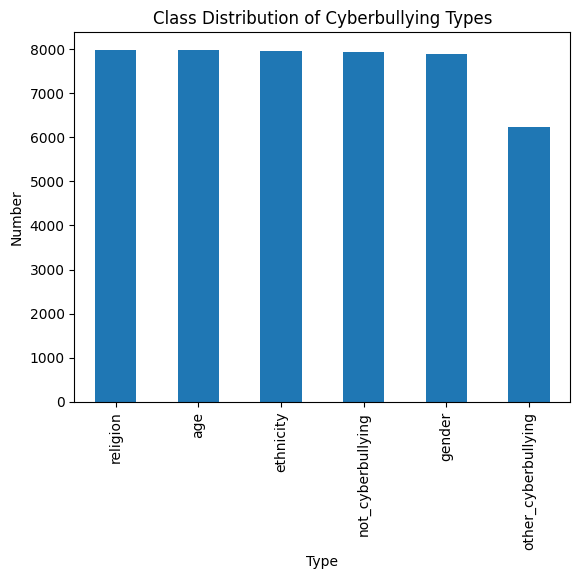

In [9]:
# Class distribution
class_distribution = df['cyberbullying_type'].value_counts()
class_distribution.plot(kind='bar')
plt.xlabel("Type")
plt.ylabel("Number")
plt.title("Class Distribution of Cyberbullying Types")
plt.show()

In [10]:
from collections import Counter
import re
import string

In [11]:
long_string = " ".join(df['tweet_text'].values)

# Remove URLs, mentions, and hashtags
long_string = re.sub(r'http\S+', '', long_string)
long_string = re.sub(r'@\S+', '', long_string)
long_string = re.sub(r'#\S+', '', long_string)

# Split into individual words
words = long_string.split()

 # Remove stopwords
stop_words = set(stopwords.words('english'))
words = [word for word in words if not word in stop_words]

In [12]:
word_count = Counter(words)
word_freq = word_count.most_common(50)
word_freq

[('I', 15578),
 ('school', 6681),
 ('like', 5178),
 ('high', 4640),
 ('dumb', 4384),
 ('bullied', 4266),
 ('RT', 4046),
 ('people', 3725),
 ('u', 3235),
 ('rape', 3020),
 ('fuck', 3012),
 ('one', 2749),
 ('bully', 2724),
 ('gay', 2685),
 ('&amp;', 2560),
 ('The', 2488),
 ('You', 2463),
 ('nigger', 2441),
 ('ass', 2435),
 ('get', 2433),
 ('girls', 2367),
 ('girl', 2270),
 ("I'm", 2225),
 ('jokes', 2068),
 ('know', 1973),
 ('would', 1918),
 ('think', 1909),
 ('black', 1865),
 ('white', 1634),
 ('got', 1559),
 ('say', 1494),
 ('FUCK', 1494),
 ('make', 1476),
 ('call', 1470),
 ('Muslim', 1421),
 ('even', 1413),
 ('called', 1413),
 ('Muslims', 1386),
 ('And', 1379),
 ('-', 1322),
 ('never', 1308),
 ('ur', 1305),
 ('see', 1292),
 ('go', 1273),
 ('still', 1267),
 ('fucking', 1256),
 ('This', 1250),
 ('want', 1250),
 ('A', 1243),
 ('If', 1188)]

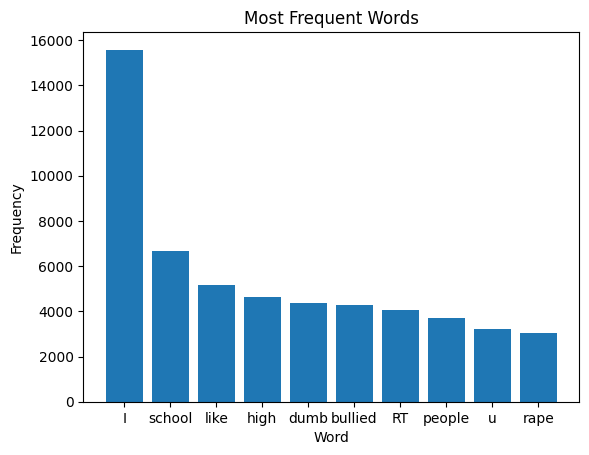

In [13]:
# Bar chart to display commmon words
word_freq = word_count.most_common(10)
x_word = [word[0] for word in word_freq]
y_freq = [word[1] for word in word_freq]
plt.bar(x_word, y_freq)
plt.xlabel('Word')
plt.ylabel('Frequency')
plt.title('Most Frequent Words')
plt.show()

In [14]:
from wordcloud import WordCloud

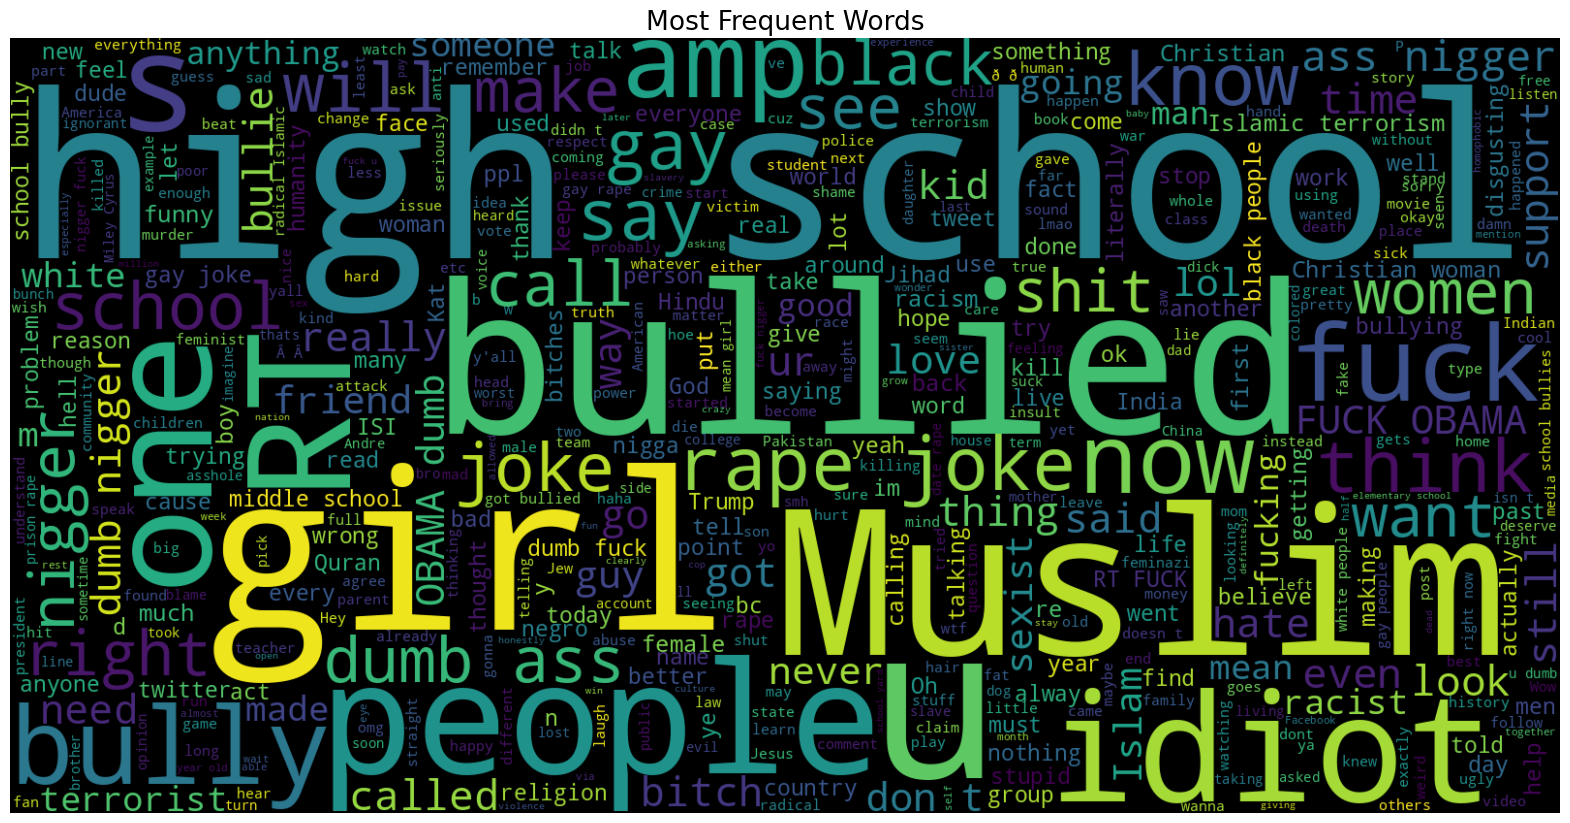

In [15]:
# long_string = " ".join(df['tweet_text'].values)
plt.figure(figsize=(20, 15))
wc = WordCloud(max_words=500, width=1600, height=800).generate(long_string)
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.title("Most Frequent Words", fontsize=19)
plt.show()

# 5. Preprocessing

In [16]:
def preprocess_text(text):

    # Remove URLs, HTML tags, mentions, and hashtags
    text = re.sub(r'http\S+', '', text)
    text = re.sub(r'<[^>]+>', '', text)
    text = re.sub('<.*?>', '', text)
    text = re.sub(r'@\S+', '', text)
    text = re.sub(r'#\S+', '', text)

    # Remove non-alphabetic characters and convert to lowercase
    text = re.sub('[^a-zA-Z]', ' ', text).lower()

    # Tokenize the text
    tokens = word_tokenize(text)

    # Lemmatize the tokens
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]

    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    text = [word for word in tokens if not word in stop_words]

    # Rejoin the cleaned tokens into a string
    cleaned_text = ' '.join(text)

    return cleaned_text

In [17]:
from tqdm.auto import tqdm
import time

In [18]:
%%time
tqdm.pandas()
df['processed_text'] = df['tweet_text'].progress_apply(preprocess_text)
df.head()

  0%|          | 0/46017 [00:00<?, ?it/s]

CPU times: user 24.3 s, sys: 1.17 s, total: 25.5 s
Wall time: 26.1 s


,tweet_text,cyberbullying_type,processed_text
0,"In other words #katandandre, your food was cra...",not_cyberbullying,word food wa crapilicious
1,Why is #aussietv so white? #MKR #theblock #ImA...,not_cyberbullying,white
2,@XochitlSuckkks a classy whore? Or more red ve...,not_cyberbullying,classy whore red velvet cupcake
3,"@Jason_Gio meh. :P thanks for the heads up, b...",not_cyberbullying,meh p thanks head concerned another angry dude...
4,@RudhoeEnglish This is an ISIS account pretend...,not_cyberbullying,isi account pretending kurdish account like is...


## 5.1 Feature Extraction

In [19]:
# Tfidf Vectorizer
tfidf_vect = TfidfVectorizer()
X_t = tfidf_vect.fit_transform(df['processed_text'])
y = df['cyberbullying_type']

In [20]:
from sklearn.feature_extraction.text import CountVectorizer

In [21]:
# Count Vectorizer
count_vect = CountVectorizer()
X_c = count_vect.fit_transform(df['processed_text'])
y = df['cyberbullying_type']

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
X_train_t, X_test_t, y_train, y_test = train_test_split(X_t, y, test_size = 0.2, random_state = 42)
X_train_c, X_test_c, y_train, y_test = train_test_split(X_c, y, test_size = 0.2, random_state = 42)

# 6. Training the Model

## 6.1 Logistic Regression Model

In [24]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, f1_score, recall_score, classification_report

In [25]:
lgr = LogisticRegression()
lgr.fit(X_train_t, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [26]:
# Evaluating model on Tfidf test set
y_pred = lgr.predict(X_test_t)

report = classification_report(y_test, y_pred)
print(report)

                     precision    recall  f1-score   support

                age       0.95      0.96      0.95      1545
          ethnicity       0.98      0.98      0.98      1635
             gender       0.90      0.83      0.86      1548
  not_cyberbullying       0.58      0.68      0.63      1638
other_cyberbullying       0.56      0.48      0.52      1267
           religion       0.95      0.94      0.94      1571

           accuracy                           0.82      9204
          macro avg       0.82      0.81      0.81      9204
       weighted avg       0.83      0.82      0.82      9204



In [27]:
lgr = LogisticRegression()
lgr.fit(X_train_c, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [28]:
# Evaluating model on Count test set
y_pred = lgr.predict(X_test_c)

report = classification_report(y_test, y_pred)
print(report)

                     precision    recall  f1-score   support

                age       0.97      0.97      0.97      1545
          ethnicity       0.99      0.98      0.99      1635
             gender       0.89      0.85      0.87      1548
  not_cyberbullying       0.60      0.66      0.62      1638
other_cyberbullying       0.56      0.54      0.55      1267
           religion       0.96      0.94      0.95      1571

           accuracy                           0.83      9204
          macro avg       0.83      0.82      0.82      9204
       weighted avg       0.83      0.83      0.83      9204



## 6.2 SVC model

In [29]:
from sklearn.svm import SVC

In [30]:
# # SVC with TFIDF Vectorizer
svc = SVC(kernel='linear', C=0.2)
svc.fit(X_train_t, y_train)

SVC(C=0.2, kernel='linear')

In [31]:
# Evaluating model on test set
y_pred = svc.predict(X_test_t)

report = classification_report(y_test, y_pred)
print(report)

                     precision    recall  f1-score   support

                age       0.94      0.97      0.96      1545
          ethnicity       0.97      0.98      0.98      1635
             gender       0.92      0.80      0.85      1548
  not_cyberbullying       0.53      0.82      0.64      1638
other_cyberbullying       0.66      0.28      0.40      1267
           religion       0.95      0.92      0.94      1571

           accuracy                           0.81      9204
          macro avg       0.83      0.80      0.79      9204
       weighted avg       0.83      0.81      0.81      9204



In [32]:
# SVC with Count Vectorizer
svc.fit(X_train_c, y_train)

SVC(C=0.2, kernel='linear')

In [33]:
# Evaluating model on test set
y_pred = svc.predict(X_test_c)

report = classification_report(y_test, y_pred)
print(report)

                     precision    recall  f1-score   support

                age       0.97      0.97      0.97      1545
          ethnicity       0.99      0.98      0.98      1635
             gender       0.90      0.86      0.88      1548
  not_cyberbullying       0.59      0.72      0.65      1638
other_cyberbullying       0.59      0.49      0.53      1267
           religion       0.96      0.94      0.95      1571

           accuracy                           0.84      9204
          macro avg       0.83      0.83      0.83      9204
       weighted avg       0.84      0.84      0.84      9204



In [34]:
from sklearn.metrics import confusion_matrix

Text(0.5, 1.0, 'Confusion Matrix')

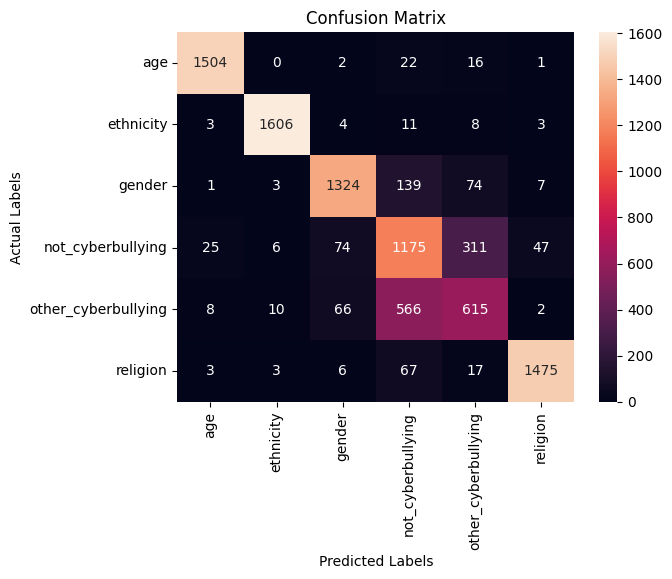

In [49]:
class_names = ['age', 'ethnicity', 'gender', 'not_cyberbullying', 'other_cyberbullying', 'religion']

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', xticklabels=class_names, yticklabels=class_names)

plt.xlabel("Predicted Labels")
plt.ylabel("Actual Labels")
plt.title("Confusion Matrix")